# 개요

> ref1 : [Black lives matter - 위키백과](https://en.wikipedia.org/wiki/Black_Lives_Matter)
> 
> ref2 : [블랙 라이브즈 매터 - 네이버 지식백과](https://terms.naver.com/entry.nhn?docId=3440367&cid=43667&categoryId=43667)

__Black Lives Matter__(블랙 라이브스 매터, 흑인의 생명은 소중하다)는 아프리카계 미국인을 향한 폭력과 제도적 인종주의에 반대하는 사회운동으로 2012년 미국에서 흑인 소년을 죽인 백인 방범요원이 이듬해 무죄 평결을 받고 풀려나면서 시작되었다고 한다. 즉, 흑인에 대한 과도한 공권력 사용에 항의할 때 사용되는 시위 구호이기도 하다.

2020년 5월 26일에 발생한 조지 플로이드(George Floyd) 사망 사건으로 인해 다시금 세계적 이슈로 떠오르고 있다.

__Fatal Police Shooting in US__ 에서는 2014년 8월 9일 미국 미주리주 퍼거슨(Ferguson, Missouri)에서 일어난 마이클 브라운(Michael Brown) 사망 사건과 관련된 데이터를 다루고 있다.

<<워싱턴 포스트(Washington Post)>>는 2015년 1월 1일부터 근무 중인 경찰관의 미국 내 모든 총격사건을 데이터베이스로 작성해 왔다.
경찰 살인이 종합적으로 문서화되지 않은 데다 경찰의 잔혹성에 대한 통계 자료도 훨씬 적어 이 시기 이전부터 믿을 만한 자료를 찾기가 어렵다. 결과적으로, 수많은 사건들이 보고되지 않게 된다.


<<워싱턴 포스트>>는 사망자의 인종, 나이, 성별, 무장 여부, 피해자가 정신건강 위기를 겪고 있는지 등 살인에 대한 12가지 이상의 세부사항을 추적하고 있다. 그들은 이 정보를 법 집행 웹사이트, 지역 새 보고서, 소셜 미디어에서 수집했으며 "Killed by police(경찰에 의해 살해됨)"과 "Fatal Encounters(죽음을 초래함)"과 같은 독립적인 데이터베이스를 감시함으로써 수집했다.


미국 경찰관이 살인을 한 데이터 PoliceKillingsUS.csv 외에도,

4개의 추가 데이터 집합이 있다. 
- 빈곤율 (poverty rate) - PercentagePeopleBelowPovertyLevel.csv
- 고등학교 졸업율 (high school graduation rate) - PercentOver25CompletedHighSchool.csv
- 중위 가계 소득 (median household income) - MedianHouseholdIncome2015.csv
- 인종 인구 통계에 대한 미국의 인구 조사 (racial demographics) - ShareRaceByCity.csv


# Env Setting



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore') 

# "input/" 디렉토리에 입력 데이터 파일이 있는지 확인
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



# Read Datas

In [4]:
# Read datas
median_house_hold_in_come = pd.read_csv('input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('input/PoliceKillingsUS.csv', encoding="windows-1252")

print("Reading complete!")

Reading complete!


## Detail about data

5개의 입력 데이터에 대해 간단히 살펴보자

1. MedianHouseholdIncome2015.csv
2. PercentOver25CompletedHighSchool.csv
3. PercentagePeopleBelowPovertyLevel.csv
4. PoliceKillingsUS.csv
5. ShareRaceByCity.csv

> 참고용 그림

![US states](https://upload.wikimedia.org/wikipedia/commons/thumb/5/57/United_States_Map_in_Korean.jpg/1200px-United_States_Map_in_Korean.jpg)

### MedianHouseholdIncome2015.csv

모든 미국 도시의 중위 가계 소득을 나타내는 미국 인구조사국(US Census) 데이터.

Features:
- "Geographic Area": 주(state)
- "City": 도시
- "Median Income": 지정된 도시의 중위 가구 소득.

In [11]:
median_house_hold_in_come.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


### PercentOver25CompletedHighSchool.csv

미국의 모든 도시에서 25세 이상의 고등학교 졸업률을 나타내는 US Census 데이터.

Features:
- "Geographic area": 주(State)
- "City": 도시
- "percent_completed_hs": 해당 도시에서 고등학교를 졸업한 25세 이상의 인구 비율

In [15]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


### PercentagePeopleBelowPovertyLevel.csv

> 원본 데이터 설명(detail)에서는 중위 소득 데이터와 같은 설명으로 잘못 표기된 듯 하다

모든 미국 도시의 빈곤층 비율을 나타내는 데이터

Features:
- "Geographic area": 주(State)
- "City": 도시
- "poverty_rate": 해당 도시의 빈곤층 비율

In [16]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


### PoliceKillingsUS.csv

> 이것 역시 원본 데이터의 설명이 잘못되어 있음 (잘못 해석한 부분이 있을 수 있음)

경찰관에 의해 죽은 사망자들에 대한 데이터

Features:
- "id" : 인덱스 값
- "name" : 피해자 이름
- "date" : 사건 날짜
- "manner_of_death" : 죽은 원인
- "armed" : 무장 상태
- "age" : 피해자 나이
- "gender" : 성별
- "race" : 인종
- "city" : 출신 도시
- "state" : 출신 지역
- "signs_of_mental_illness" : 정신병 증상 여부
- "threat_level" : 위협 수준
- "flee" : 도망 여부
- "body_camera" : 바디 카메라 여부

In [23]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

### ShareRaceByCity.csv

미국 모든 도시의 인종 인구 통계에 관한 US Census 데이터

Features:
- "Geographic area": 주(State)
- "City": 도시
- "share_white": 백인 비율
- "share_black": 흑인 비율
- "share_native_american": 미국 원주민 비율
- "share_asian": 아시안 비율
- "share_hispanic": 히스패닉 비율

In [17]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


# EDA plan

미국에 대한 전반적인 분석을 간단히 하고 메인 데이터인 PoliceKillingsUS와 연계하여 분석한다 

- 미국 통계 분석
    1. 각 state의 빈곤율
    2. 가장 일반적인 15명의 사망자의 이름 또는 성
    3. State에서 25세 이상 고졸 비율
    4. 고등학교 졸업률 vs 빈곤율 비교
    5. 흑인, 백인, 원주민, 아시아, 히스패닉 인종에 따른 각 state 인구 비율
- 경찰의 살인 사건
    1. PoliceKillingsUS 데이터의 각 속성 분석
    2. 사망자 인종 비율
    3. 각 state별 사망자 수

# EDA with Visualization

## Poverty rate of each state (빈곤율)

In [63]:
percentage_people_below_poverty_level.describe()

,poverty_rate
count,29329.000000
mean,16.331259
std,13.202495
min,0.000000
25%,7.000000
50%,13.600000
75%,22.400000
max,100.000000


```
데이터를 자세히 살펴보면 __poverty_rate__ 속성은 float64 데이터 타입을 가지고 있는데 1% 정도가 '-' 속성값을 가진다.

또한 빈곤율이 어떻게 계산되는 건지 잘 모르는 문제는... 잘 모르겠다ㅠ
```

빈곤율이 최대 100%에서 최소 0%이며 평균은 대략 16%인 것을 확인할 수 있다

### Bar plot

In [16]:
### Poverty rate of each state ###

# 가독성을 위해 percentage_people_below_poverty_level -> poverty로 줄임
poverty = percentage_people_below_poverty_level

# '-'로 표시되는 이상치들을 0.0으로 바꾸고 float형으로 변환
poverty.poverty_rate.replace(['-'],0.0,inplace = True)
poverty.poverty_rate = poverty.poverty_rate.astype(float)

# 각 state 별로 빈곤율을 확인하기 위해 state 리스트 생성
area_list = list(poverty['Geographic Area'].unique())
area_poverty_ratio = []  # 해당 state의 빈곤율 저장 리스트

for area_name in area_list:
    x = poverty[poverty['Geographic Area']==area_name]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
    
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

Text(0.5, 1.0, 'Poverty Rate Given States')

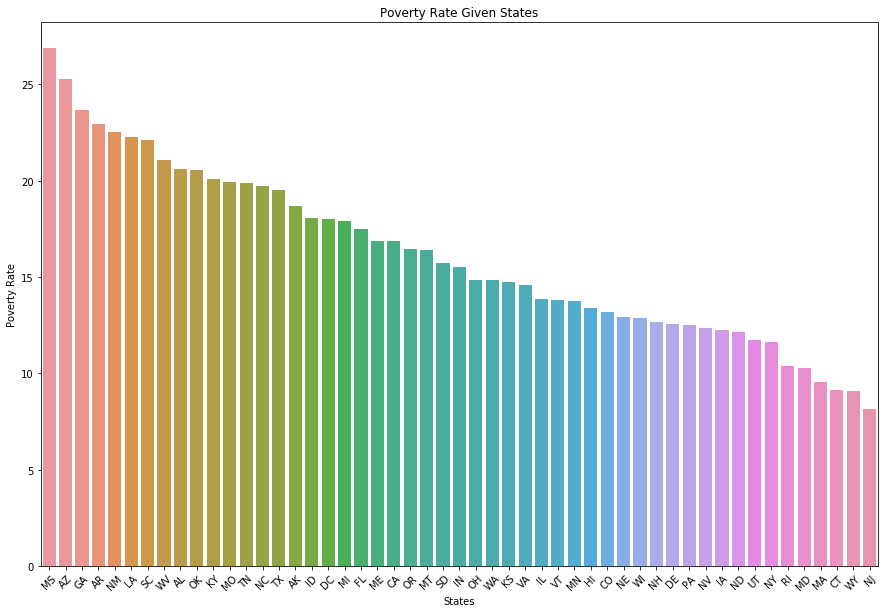

In [70]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

## Most common 15 Name or Surname of killed people

In [8]:
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [7]:
kill.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

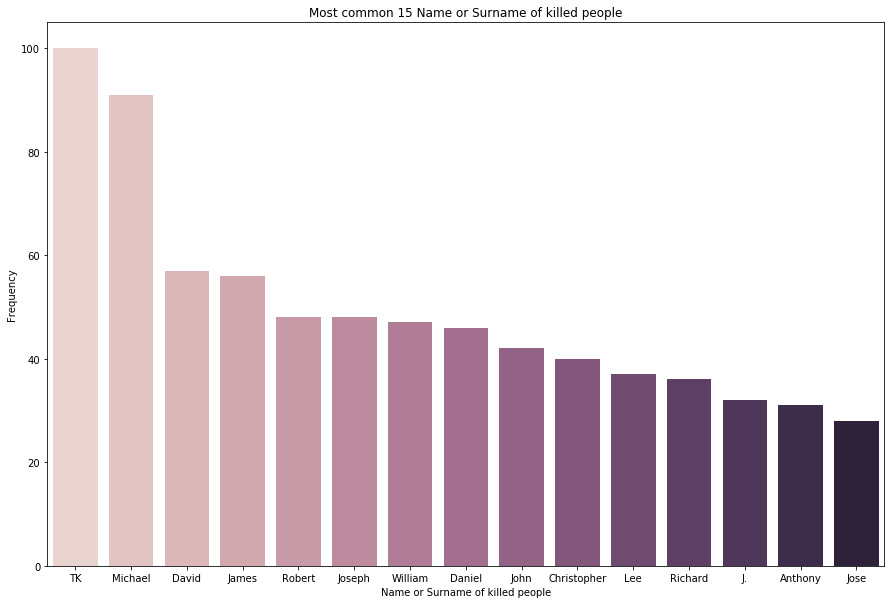

In [9]:
separate = kill.name.str.split() 
a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# 
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

```
'TK'가 무슨 의미를 가지는지 잘 모르겠다ㅠ 예제에서는 'TK'를 제거하며 15등으로 Joshua가 표시된다
```

이번 사건의 사망자 이름에도 마이클(Michael)이 들어간다...

## High school graduation rate of the population that is older than 25 in states


In [10]:
percent_over_25_completed_highSchool

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

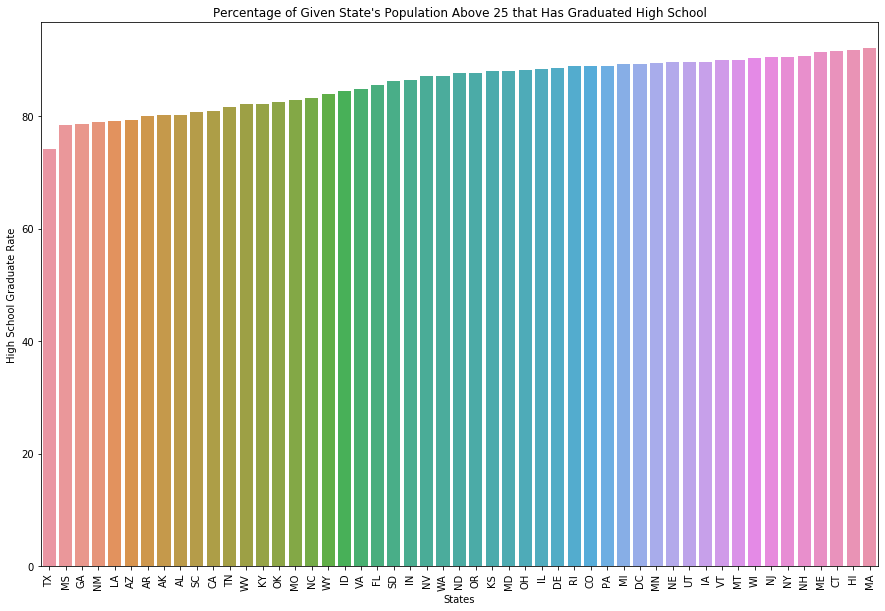

In [11]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

앞선 5.1의 빈곤률 그래프를 참고하며 살펴보자

|     | Top 3 | Bottom 3 |
| --- |  ---  |   ---    |
| poverty   | MS, AZ, GA | NJ, WY, CT |
| graduated | MA, HI, CT | TX, MS, GA |


미시시피(MS)가 빈곤률이 가장 높으며 고졸 비율이 하위 2등인 것을 볼 수 있다

조지아(GA) 역시 빈곤률은 3번째로 높고 고졸 비율 역시 3번째로 낮은 것을 볼 수 있다

## High school graduation rate vs Poverty rate of each state

Point Plot로 시각화하여 한 눈에 비교해 보자

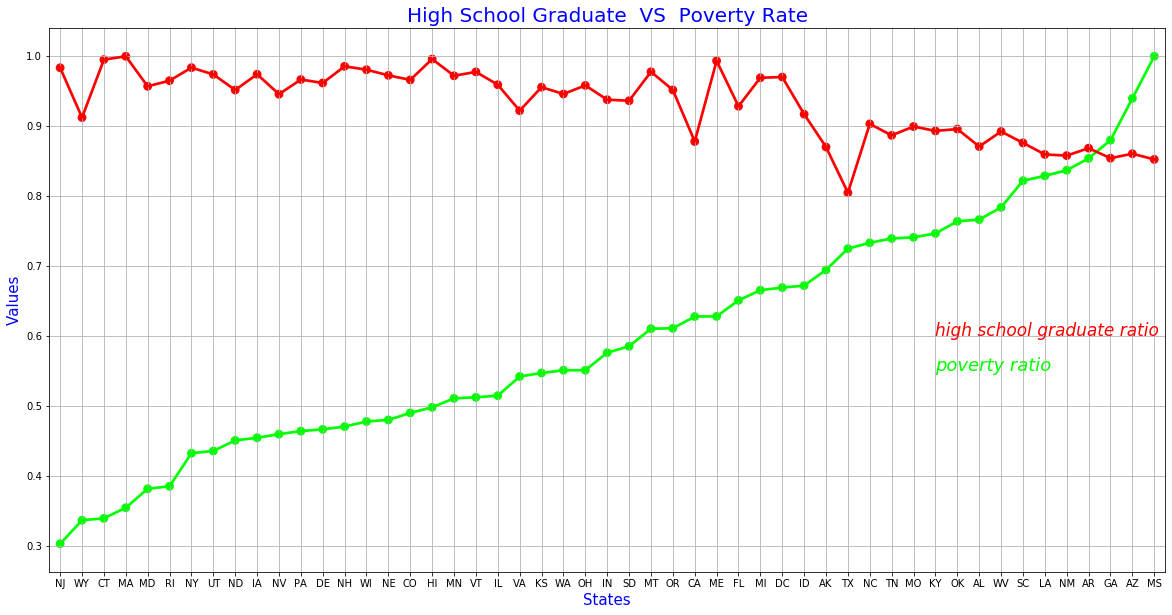

In [17]:
# high school graduation rate vs Poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

In [19]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


빈곤률이 높을수록 고등교육 졸업 비율이 낮아지는 것을 볼 수 있다

조금 더 명확하게 표현하기 위해 Joint Plot을 사용하여 시각화 해보자

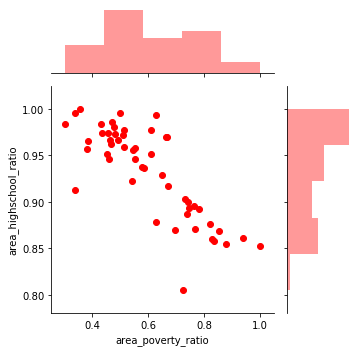

In [21]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="r")

## Percentage of state's population according to races that are black,white,native american, asian and hispanic

In [12]:
share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

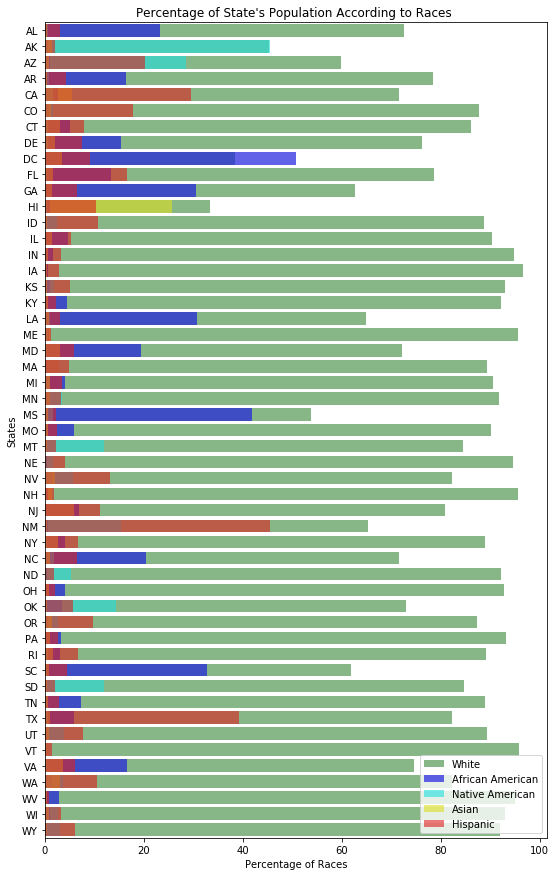

In [13]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

## Kill properties

### Race

In [23]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

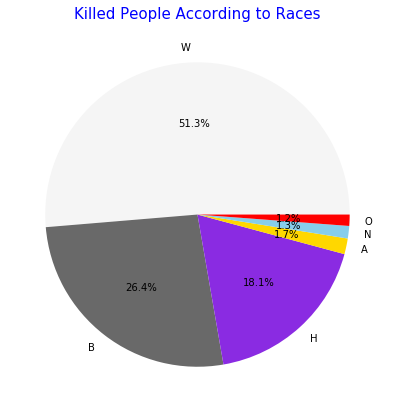

In [30]:
# Race rates according in kill data 
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['whitesmoke','dimgray','blueviolet','gold','skyblue','red']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

Text(0.5, 1.0, 'Race of killed people')

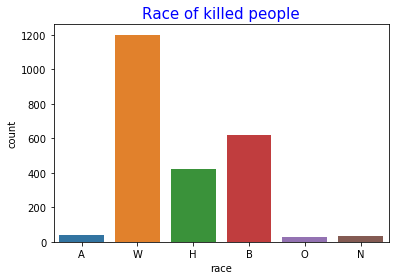

In [39]:
# Race of killed people
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

### Manner of death

In [31]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

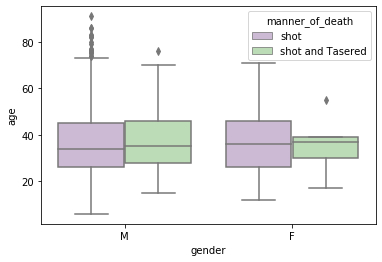

In [32]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

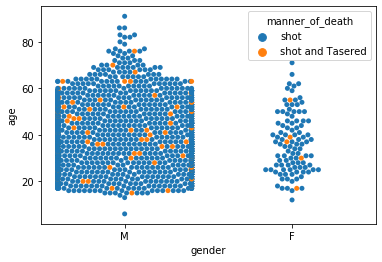

In [33]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

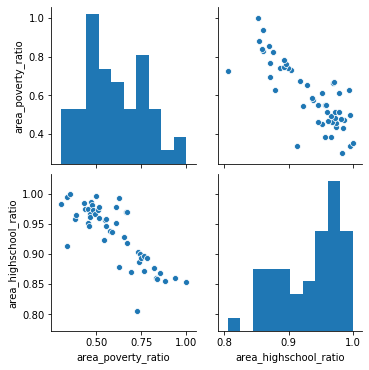

In [34]:
# pair plot
sns.pairplot(data)
plt.show()

### Gender

In [35]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender')

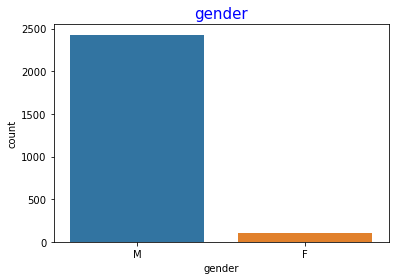

In [36]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

### Armed

Text(0.5, 1.0, 'Kill weapon')

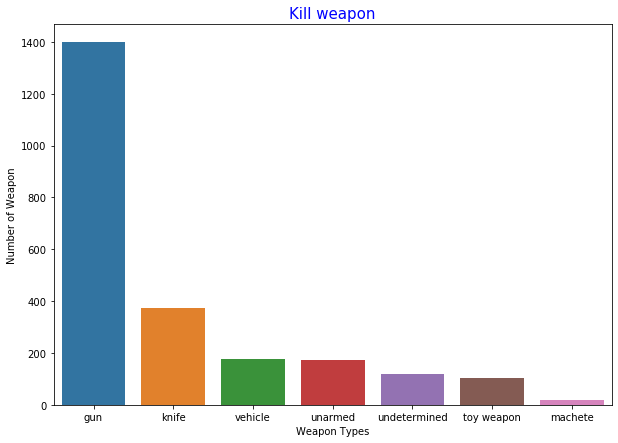

In [37]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

### Age

Text(0.5, 1.0, 'Age of killed people')

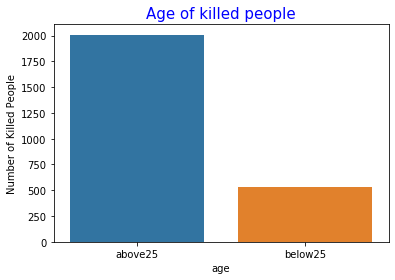

In [38]:
# age of killed people
above25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

### Dangerous areas

Text(0.5, 1.0, 'Most dangerous cities')

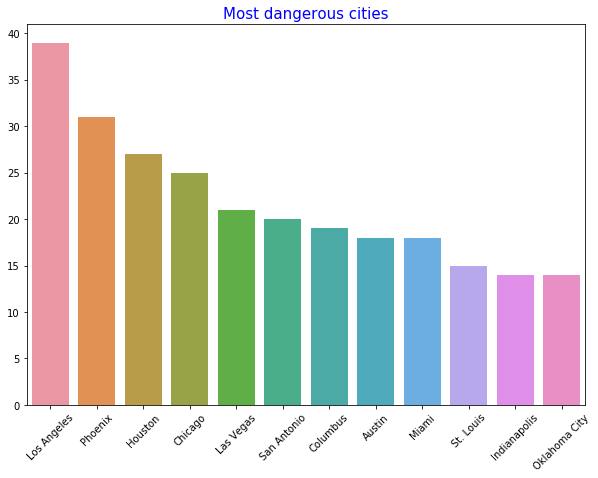

In [40]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Most dangerous state')

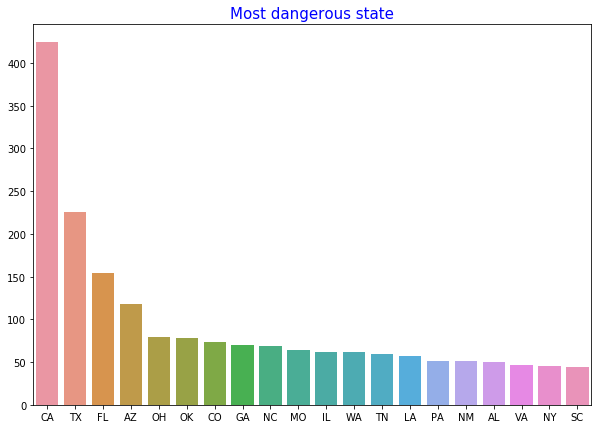

In [41]:
# most dangerous states
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

### Mental illness

Text(0.5, 1.0, 'Having mental illness or not')

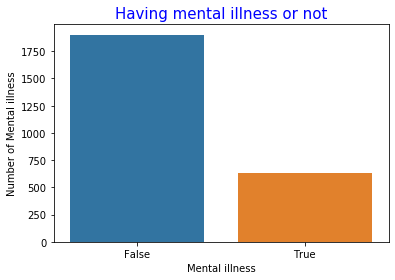

In [42]:
# Having mental ilness or not for killed people
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Threat types')

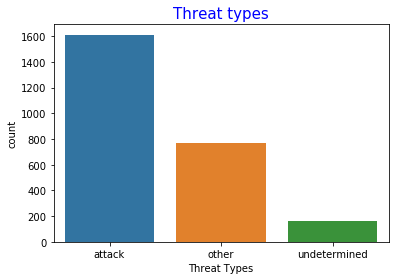

In [43]:
# Threat types
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Flee types')

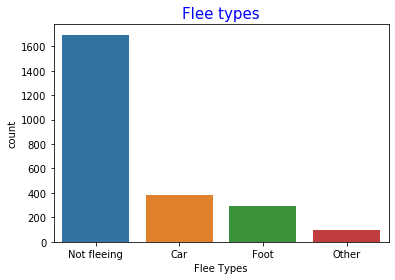

In [44]:
# Flee types
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Having body cameras or not on Police')

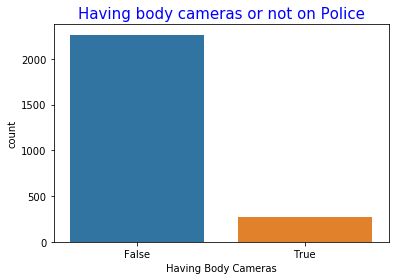

In [45]:
# Having body cameras or not for police
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

### Kill numbers from states

Text(0.5, 1.0, 'Kill Numbers from States')

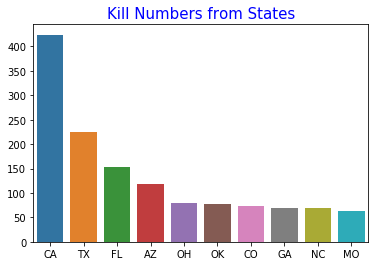

In [46]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)